# Exploratory Data Analysis for Stroke Prediction dataset

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")

## Loading the data

In [3]:
raw_df = pd.read_csv(r'Datasets\healthcare-dataset-stroke-data.csv')
raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
raw_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
raw_df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [7]:
for col_name in raw_df.columns:
    print(f"{col_name:20}", len(raw_df[col_name].unique()))

id                   5110
gender               3
age                  104
hypertension         2
heart_disease        2
ever_married         2
work_type            5
Residence_type       2
avg_glucose_level    3979
bmi                  419
smoking_status       4
stroke               2


In [8]:
CATEGORICAL_COLS = ['gender', 'work_type', 'smoking_status']
BINARY_COLS = ['hypertension', 'heart_disease', 'ever_married', 'Residence_type']
NUMERICAL_COLS = ['age', 'avg_glucose_level', 'bmi']
TARGET_COL = 'stroke'

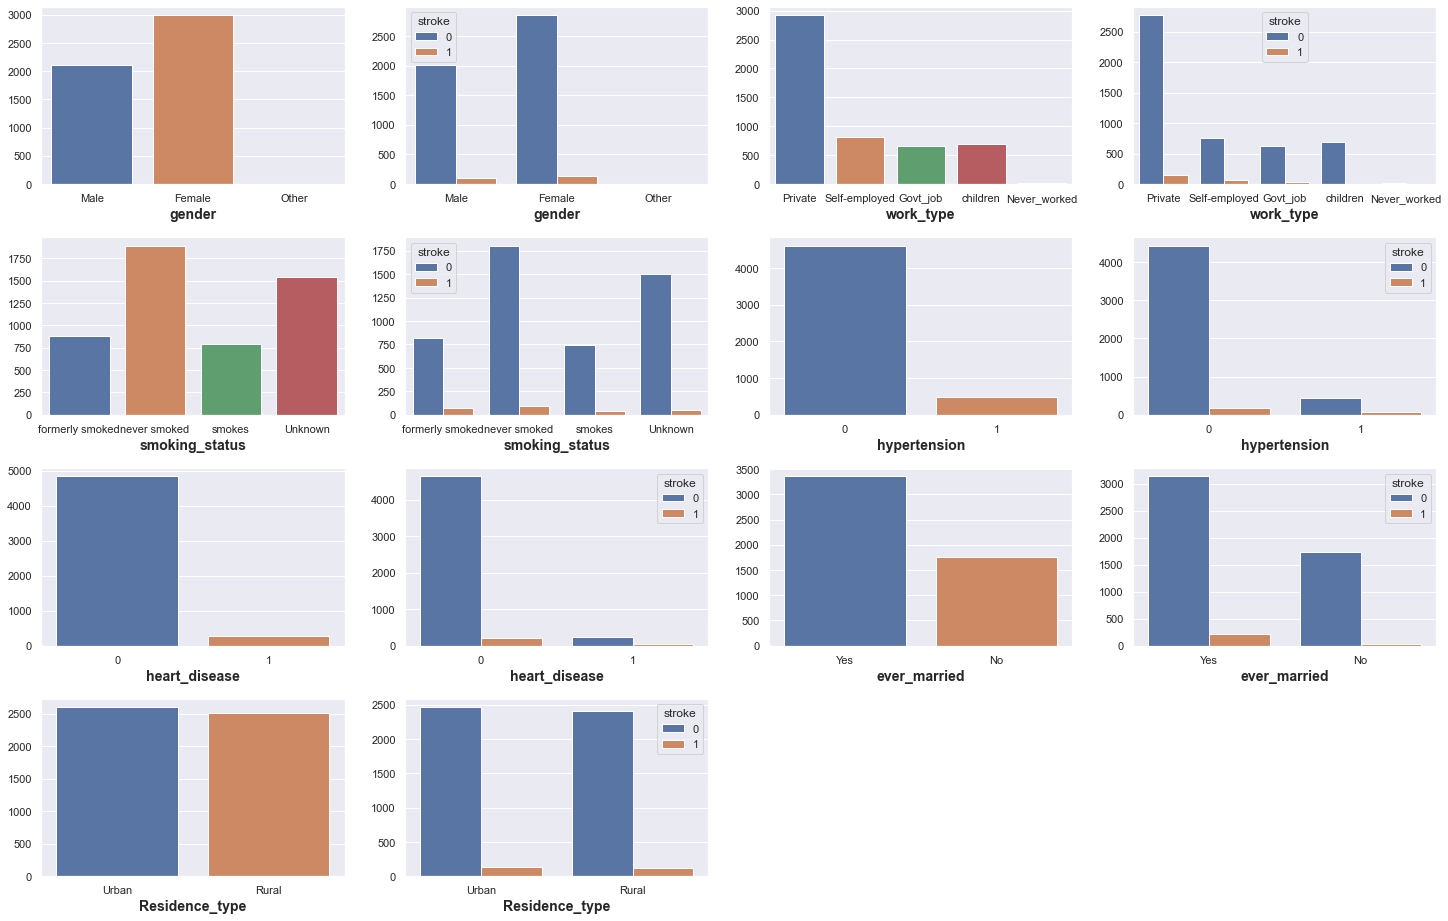

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(25, 16))
fig.subplots_adjust(hspace = 0.3)
axes = axes.flatten()

for i, col_name in enumerate(CATEGORICAL_COLS + BINARY_COLS):
    sns.countplot(x = col_name, data = raw_df, ax = axes[2*i])
    axes[2*i].set_xlabel(col_name, fontweight = "bold", size = 14)
    axes[2*i].set_ylabel('')

    sns.countplot(x = col_name, data = raw_df, hue = TARGET_COL, ax = axes[2*i + 1])
    axes[2*i + 1].set_ylabel('')
    axes[2*i + 1].set_xlabel(col_name, fontweight = "bold", size = 14)

axes[14].set_visible(False)
axes[15].set_visible(False)

plt.show()


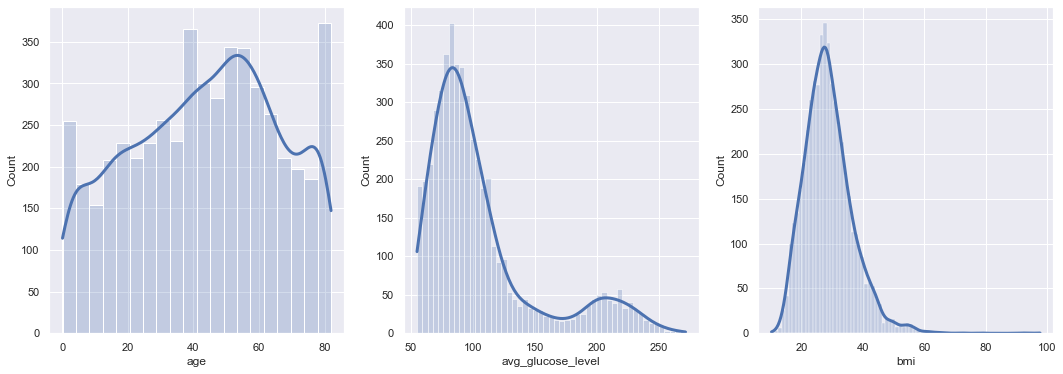

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col_name in enumerate(NUMERICAL_COLS):
    sns.histplot(x = col_name, data = raw_df, kde=True, 
                   alpha = 0.25, ax = axes[i],
                   line_kws = {'linewidth': 3})